# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
##  import the data
data = pd.read_csv('stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") 

There are 340 rows and 15 columns.


In [6]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [7]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations:**
- The variables `Ticker Symbol`, `Security`, `GICS Sector`, and `GICS Sun Industry` are of categorical datatypes
- The variables `ROE`, `Cash Ratio`, `Net Cash Flow`, and `Net Income` are of integer datatypes while the rest are float datatypes

In [8]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [16]:
# checking for duplicate values
df.duplicated().sum()    

0

**Observations:**

There are no duplicates in the dataset

In [19]:
# checking for missing values in the data
df.isnull().sum() 

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observations:**
- There are no missing values in the dataset

In [20]:
# get the summary statistics of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,EXR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,Exelon Corp.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340,NaN,NaN,NaN,80.8623,98.0551,4.5,38.555,59.705,92.88,1274.95
Price Change,340,NaN,NaN,NaN,4.07819,12.0063,-47.1297,-0.939484,4.8195,10.6955,55.0517
Volatility,340,NaN,NaN,NaN,1.52598,0.591798,0.733163,1.13488,1.38559,1.69555,4.58004
ROE,340,NaN,NaN,NaN,39.5971,96.5475,1,9.75,15,27,917
Cash Ratio,340,NaN,NaN,NaN,70.0235,90.4213,0,18,47,99,958
Net Cash Flow,340,NaN,NaN,NaN,5.55376e+07,1.94637e+09,-1.1208e+10,-1.93906e+08,2.098e+06,1.69811e+08,2.0764e+10


**Observations:**
- There are 11 unique Sectors. 
- There are 104 unique sub industries.
- The company with the most valuable stock is currently vlaued at USD1,274.95.
- The company with the least valuable stock is currently vlaued at USD80.86.
- The stock with the highest price change had its value increase by 55.05% in 13 weeks
- The stock with the least price change had its value decrease by 47.13% in 13 weeks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

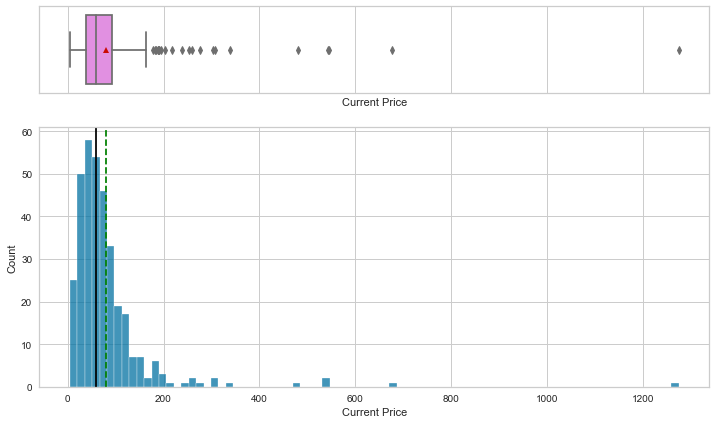

In [22]:
histogram_boxplot(df, 'Current Price')  ##  create histogram_boxplot for 'Current Price'

**`Price Change`**

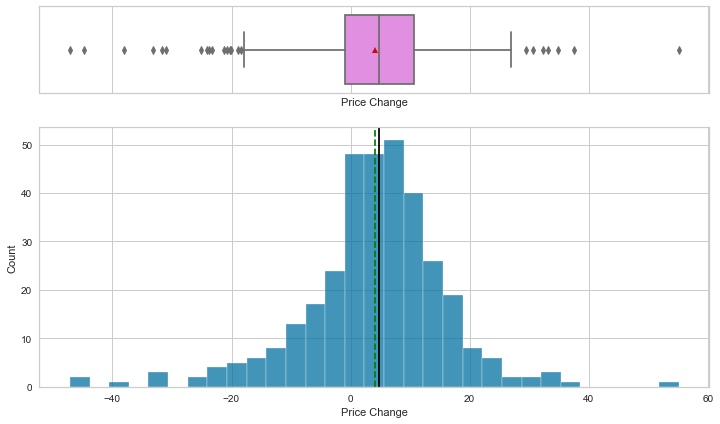

In [23]:
histogram_boxplot(df, 'Price Change')  ##  create histogram_boxplot for 'Price Change'

**`Volatility`**

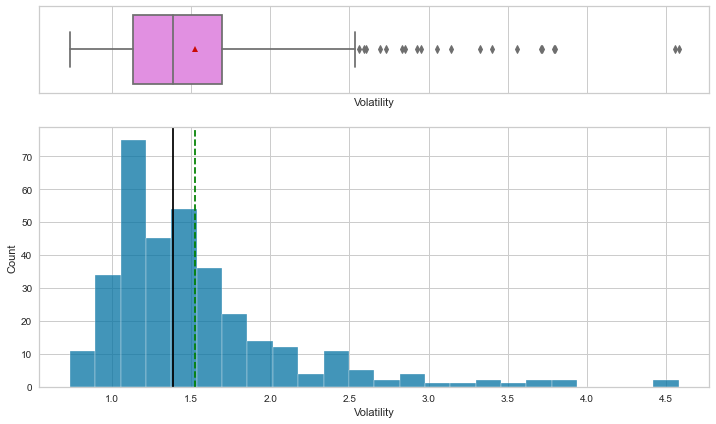

In [24]:
histogram_boxplot(df, 'Volatility')  ##  create histogram_boxplot for 'Volatility'

**`ROE`**

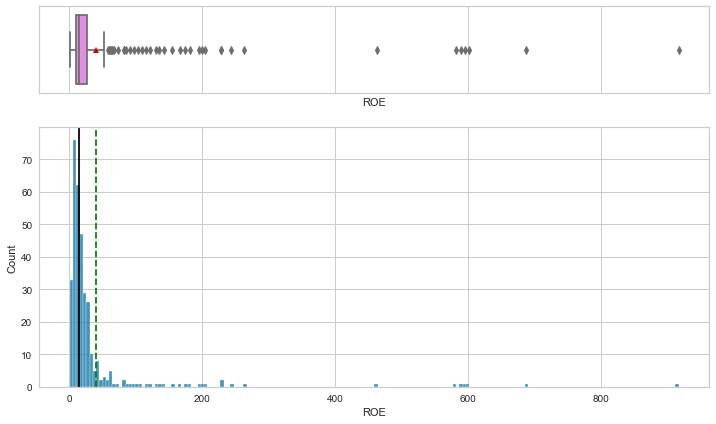

In [25]:
histogram_boxplot(df, 'ROE')  ## create histogram_boxplot for 'ROE'

**`Cash Ratio`**

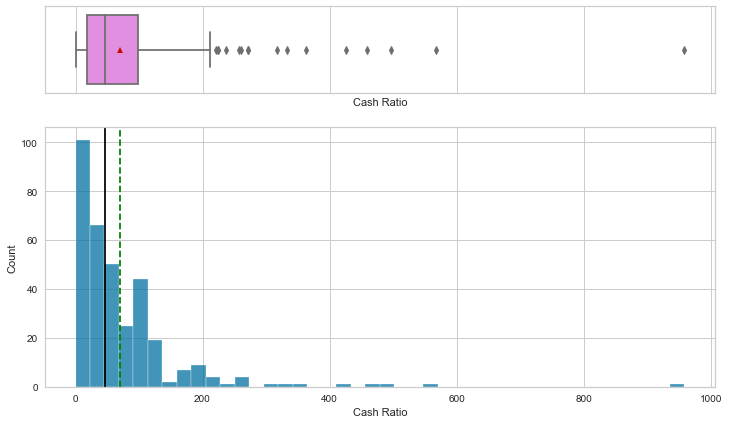

In [26]:
histogram_boxplot(df, 'Cash Ratio')  ## create histogram_boxplot for 'Cash Ratio'

**`Net Cash Flow`**

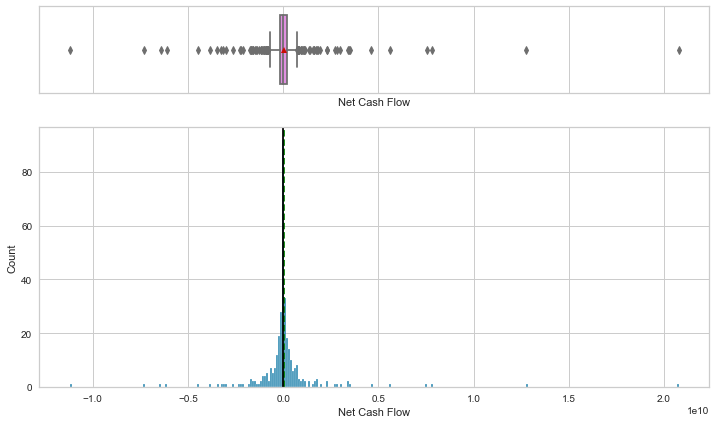

In [27]:
histogram_boxplot(df, 'Net Cash Flow')  ##  create histogram_boxplot for 'Net Cash Flow'

**`Net Income`**

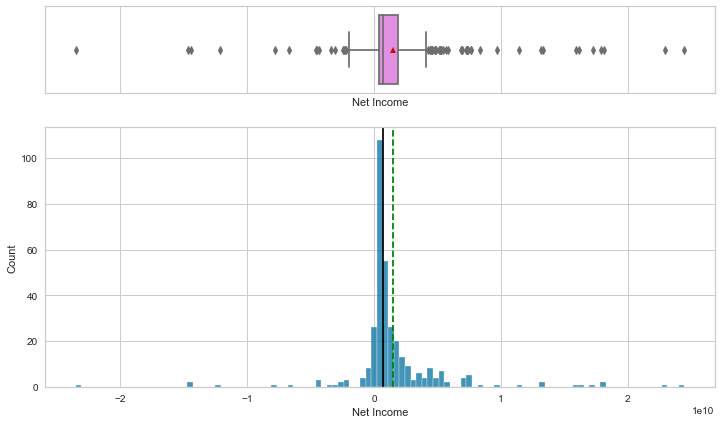

In [28]:
histogram_boxplot(df, 'Net Income')  ##  create histogram_boxplot for 'Net Income'

**`Earnings Per Share`**

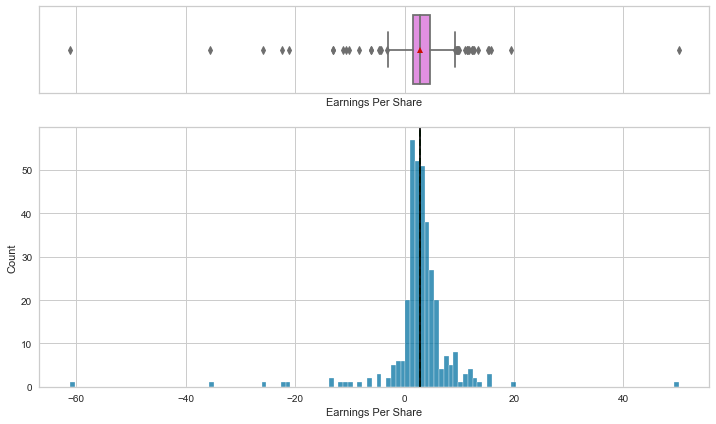

In [29]:
histogram_boxplot(df, 'Earnings Per Share')  ## create histogram_boxplot for 'Earnings Per Share'

**`Estimated Shares Outstanding`**

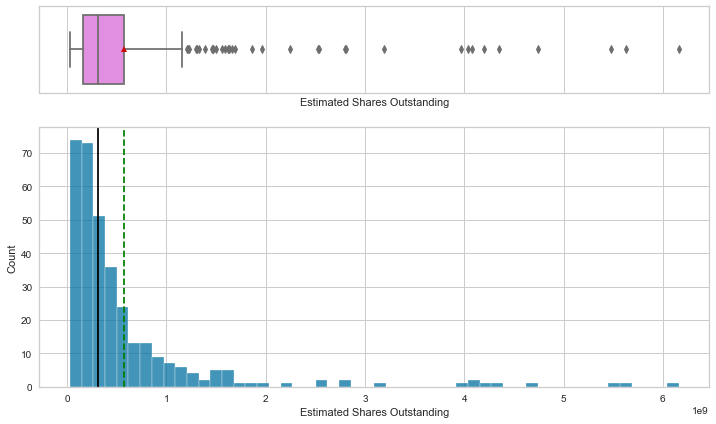

In [30]:
histogram_boxplot(df, 'Estimated Shares Outstanding')  ## create histogram_boxplot for 'Estimated Shares Outstanding'

**`P/E Ratio`**

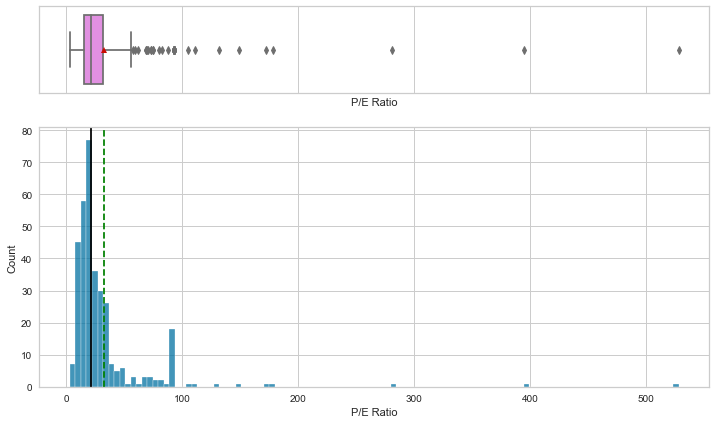

In [31]:
histogram_boxplot(df, 'P/E Ratio')  ## create histogram_boxplot for 'P/E Ratio'

**`P/B Ratio`**

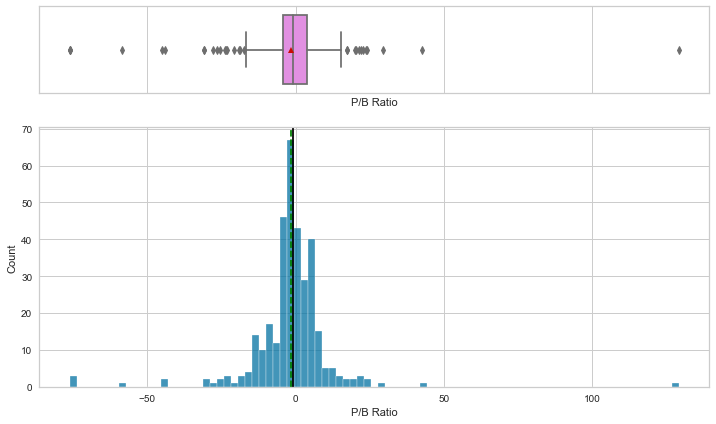

In [32]:
histogram_boxplot(df, 'P/B Ratio')  ## create histogram_boxplot for 'P/B Ratio'

**Observations:**
- The distribution of the `Current Price` is right-skewed and has some outliers
- The distribution of the `Price Change` is close to normal and has some outliers
- The distribution of the `Volatility` is a little right-skewed and has some outliers
- The distribution of the `ROE` is right-skewed and has some outliers
- The distribution of the `Cash Ratio` is right-skewed and has some outliers
- The distribution of the `Net Cash Flow` is somewhat normal and has some outliers
- The distribution of the `Net Income` is somewhat normal and has some outliers
- The distribution of the `Earnings Per Share` is somewhat normal and has some outliers
- The distribution of the `Estimated Shares Outstanding` is right-skewed and has some outliers
- The distribution of the `P/E Ratio` is right-skewed and has fewer outliers
- The distribution of the `P/B Ratio` is somewhat normal and has fewer outliers

In [33]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

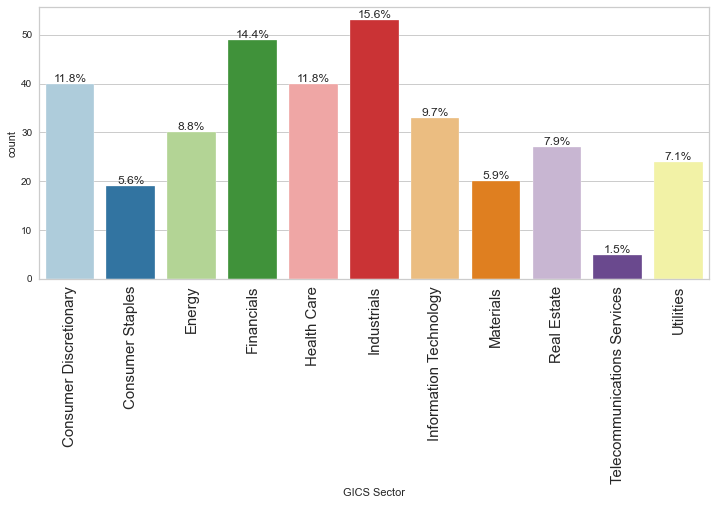

In [34]:
labeled_barplot(df, 'GICS Sector', perc=True)

**Observations:**
- The top 5 economic sectors with highest number of stocks are:
    - Indusrials
    - Finacials
    - Healthcare
    - Consumer Discretinary
    - Information Technology
    

**`GICS Sub Industry`**

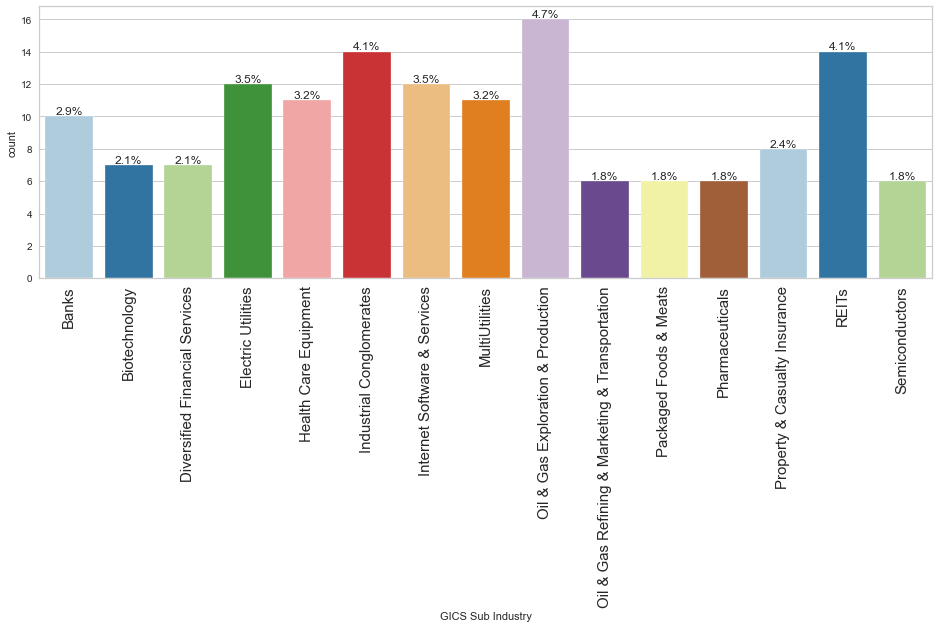

In [42]:

labeled_barplot(df, 'GICS Sub Industry', perc=True, n=15)  ## create a labelled barplot for top 15 'GICS Sub Industry'

**Observations:**
- The top 5 sub industry with highest number of stocks are:
    - Oil & Gas Exploration & Production
    - Indusrial Conglomerates
    - REITs
    - Electric Untilities
    - Information Software & Services

Industrials


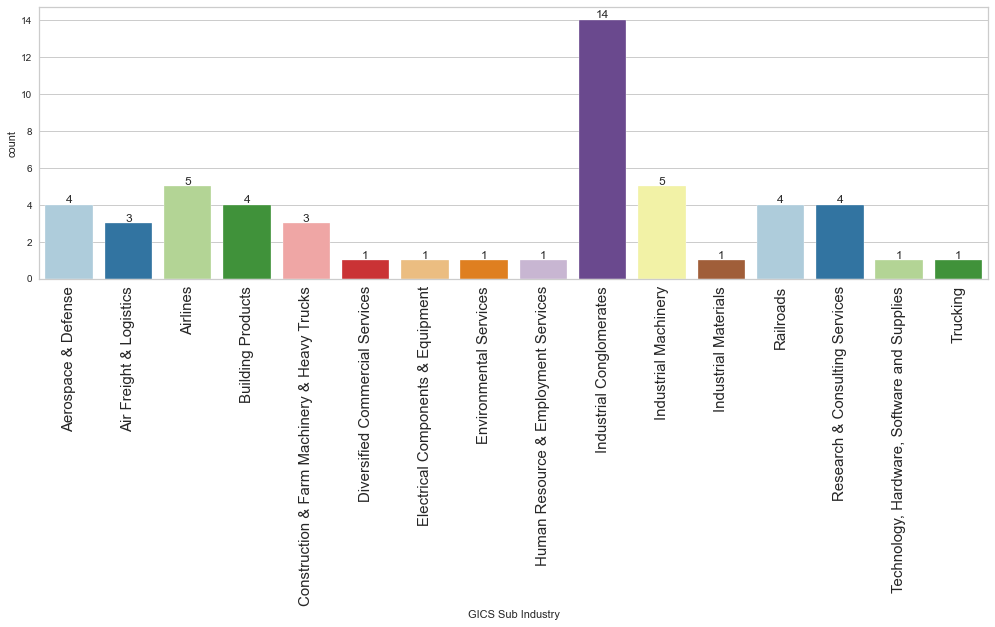

Health Care


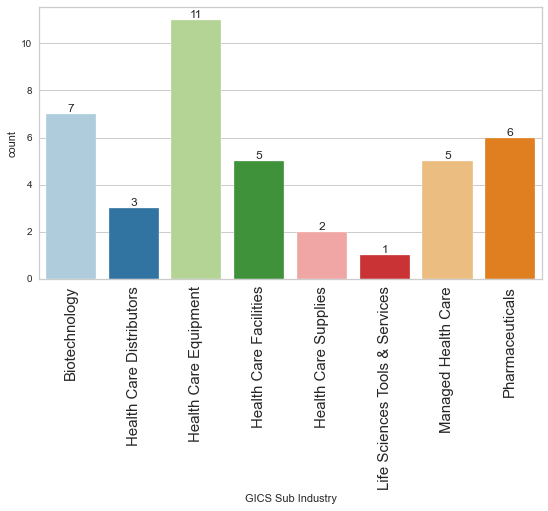

Information Technology


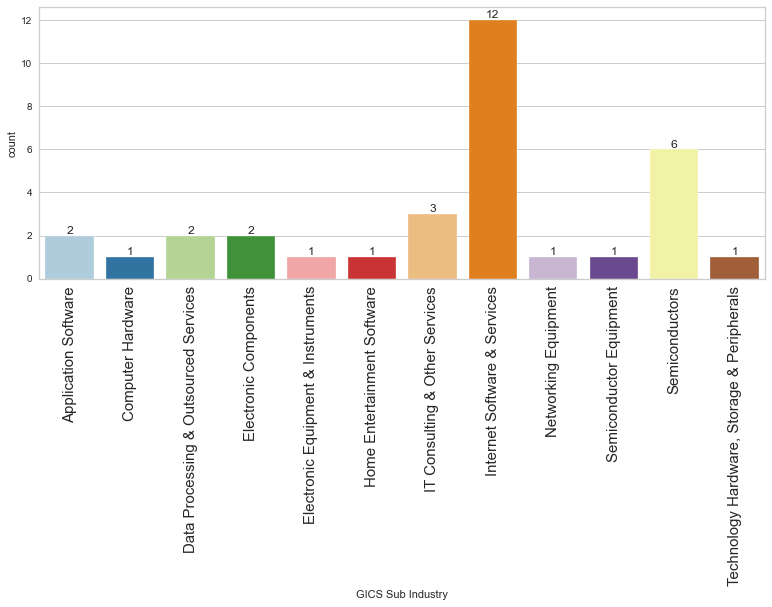

Consumer Staples


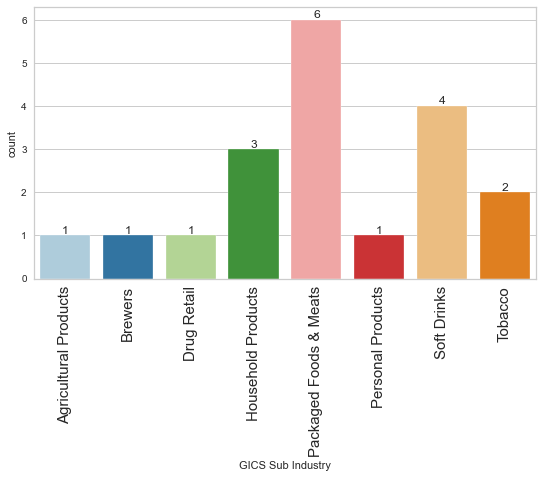

Utilities


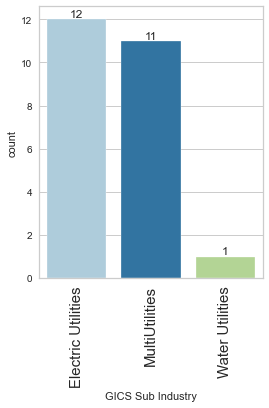

Financials


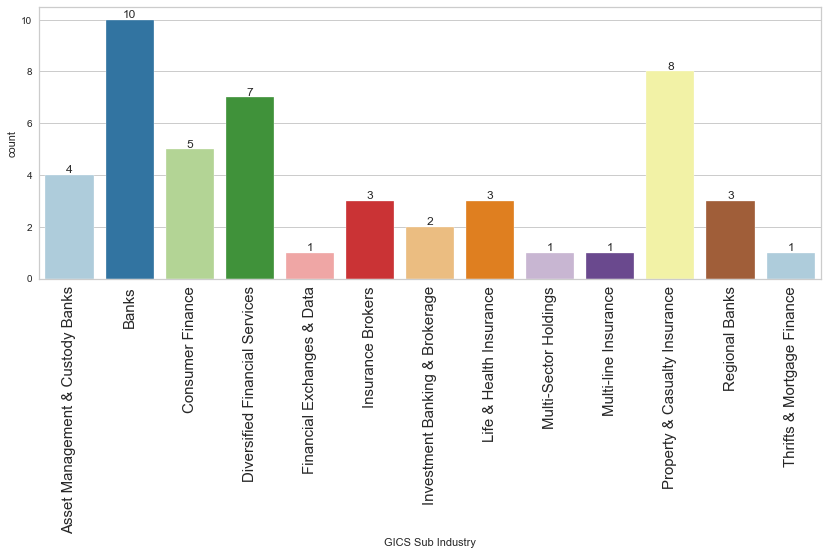

Real Estate


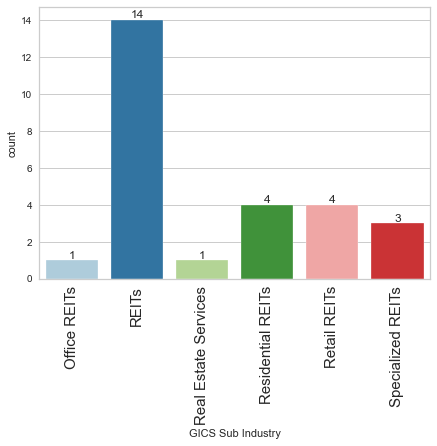

Materials


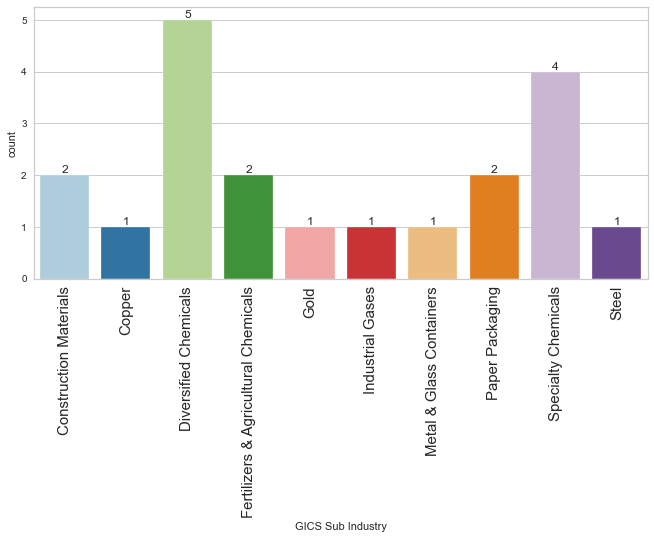

Consumer Discretionary


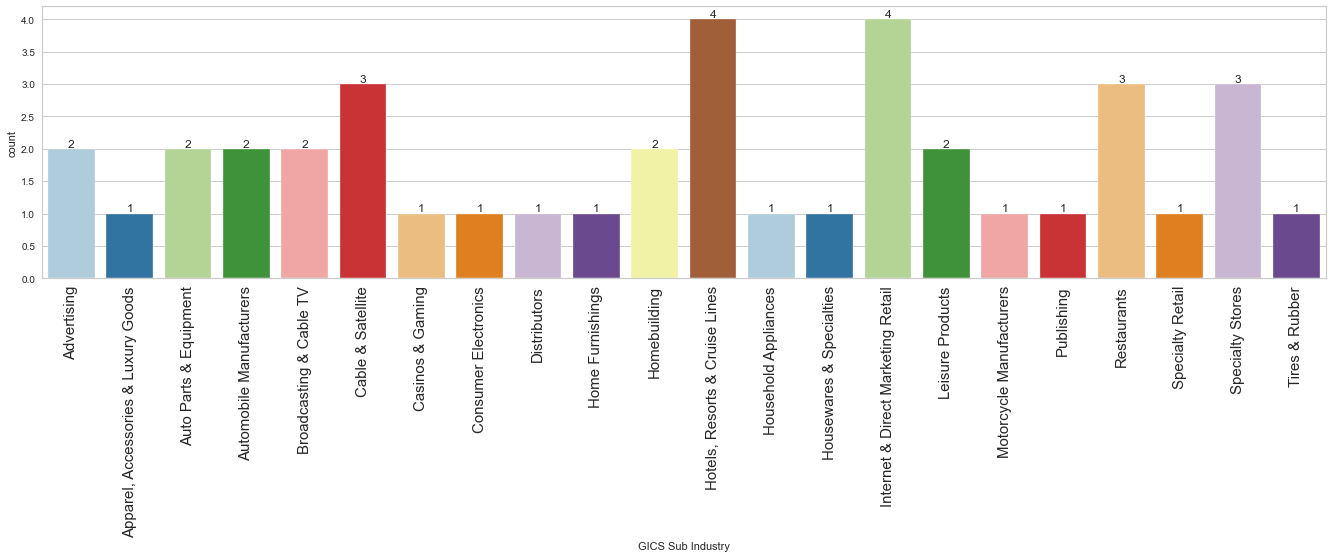

Energy


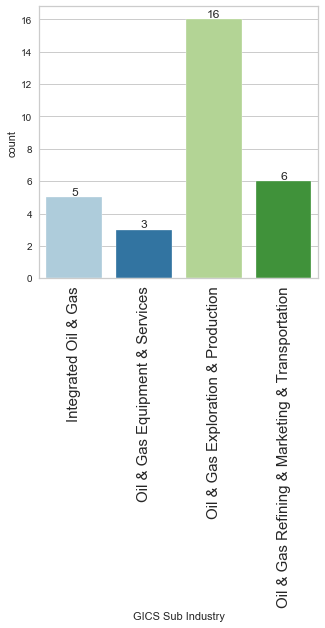

Telecommunications Services


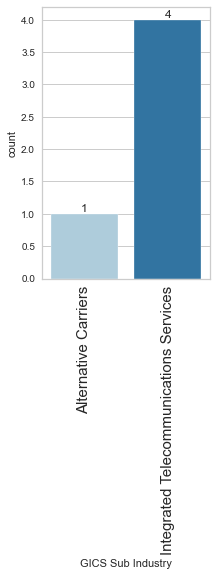

In [118]:
sc=df["GICS Sector"].unique() #list of Sectors
for i in sc:
    print(i)
    labeled_barplot(df[df["GICS Sector"]==i],"GICS Sub Industry")

### Bivariate Analysis

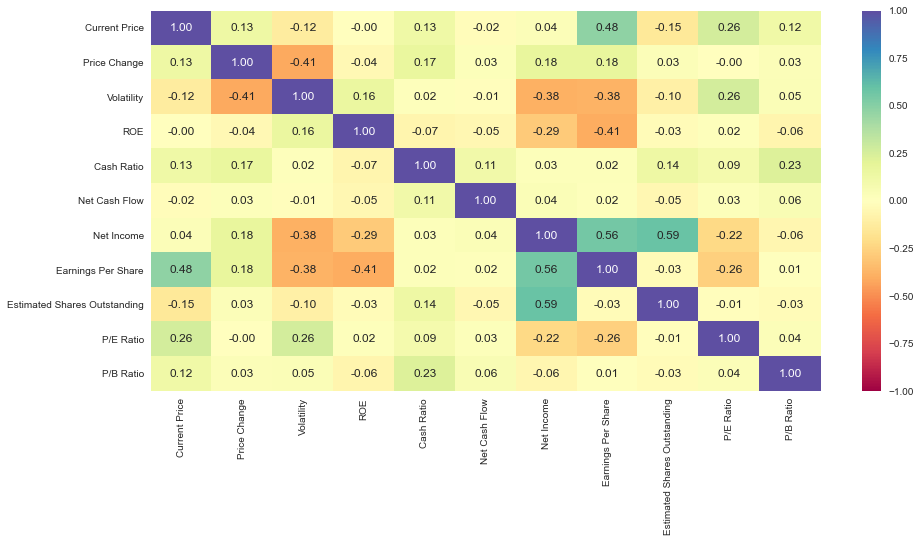

In [36]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- As expected, the net income is positively correlated with earnings per share and estimated share outstanding
- The earnings per share on the other hand is negatively correlated with volatility and ROE but positively correlated with current stock price as expected


**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

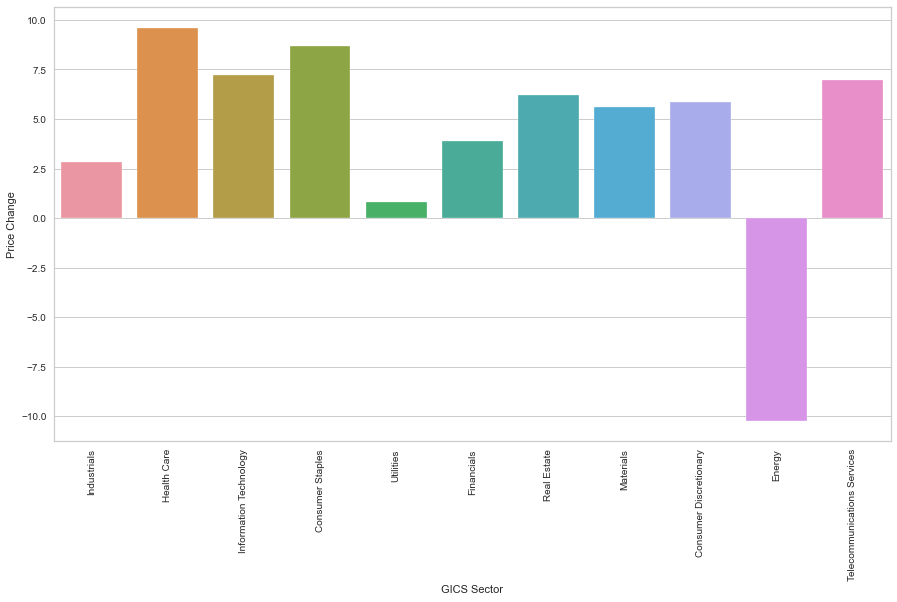

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  
plt.xticks(rotation=90)
plt.show()

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

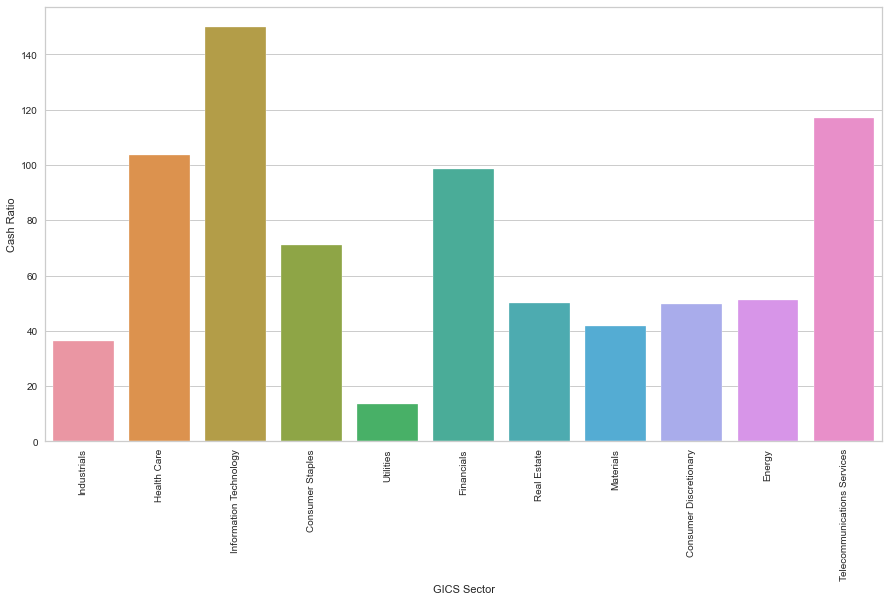

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  
plt.xticks(rotation=90)
plt.show()

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

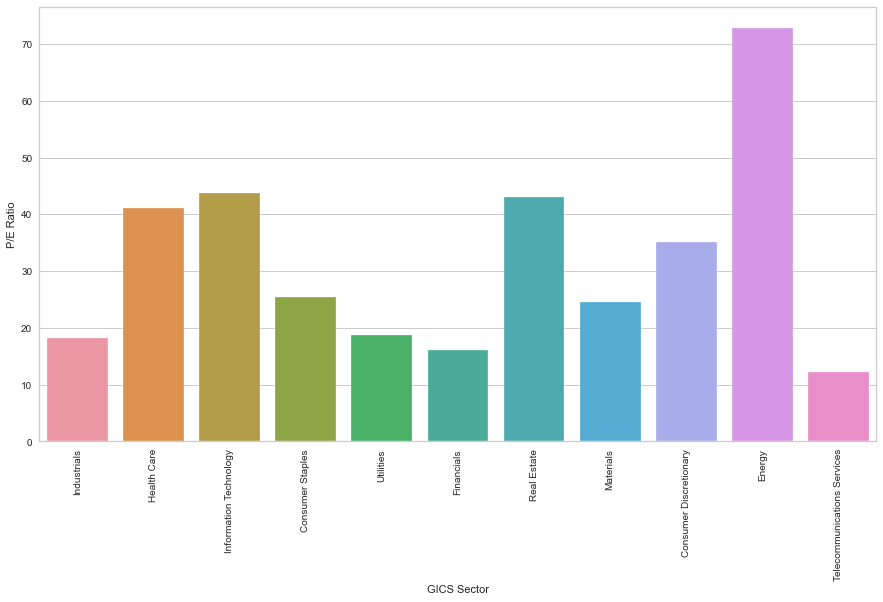

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  
plt.xticks(rotation=90)
plt.show()

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

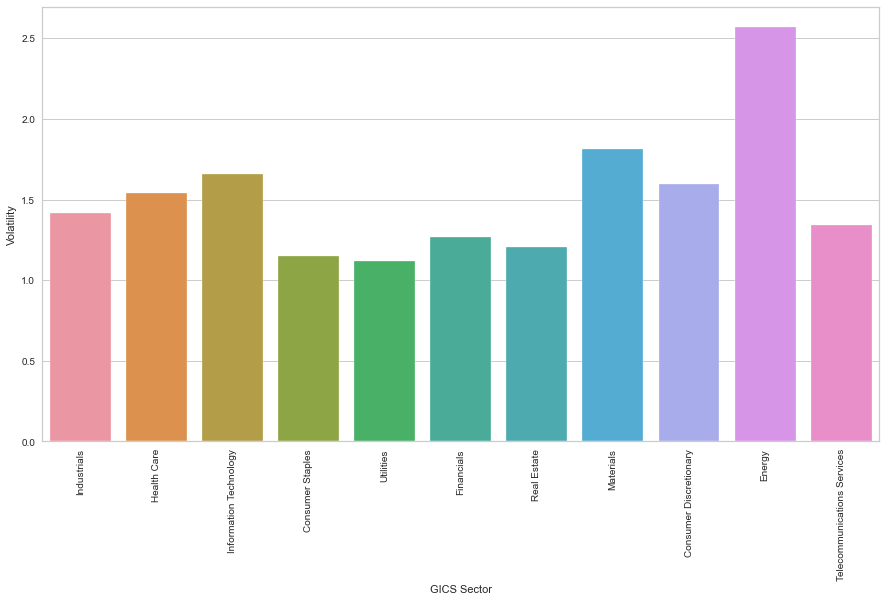

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  
plt.xticks(rotation=90)
plt.show()

**Obervations:**
- The healthcare sector is the economic sector with stocks that have the maximum price increase on average
- The information technology sector has the highest cash ratio on average followed by telecommunication services, healthcare and financials
- The energy sector has an significantly high P/E ratios on average
- The volatility is pretty much same across all sectors except for the energy sector which also has asignificantly high volatility on average

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

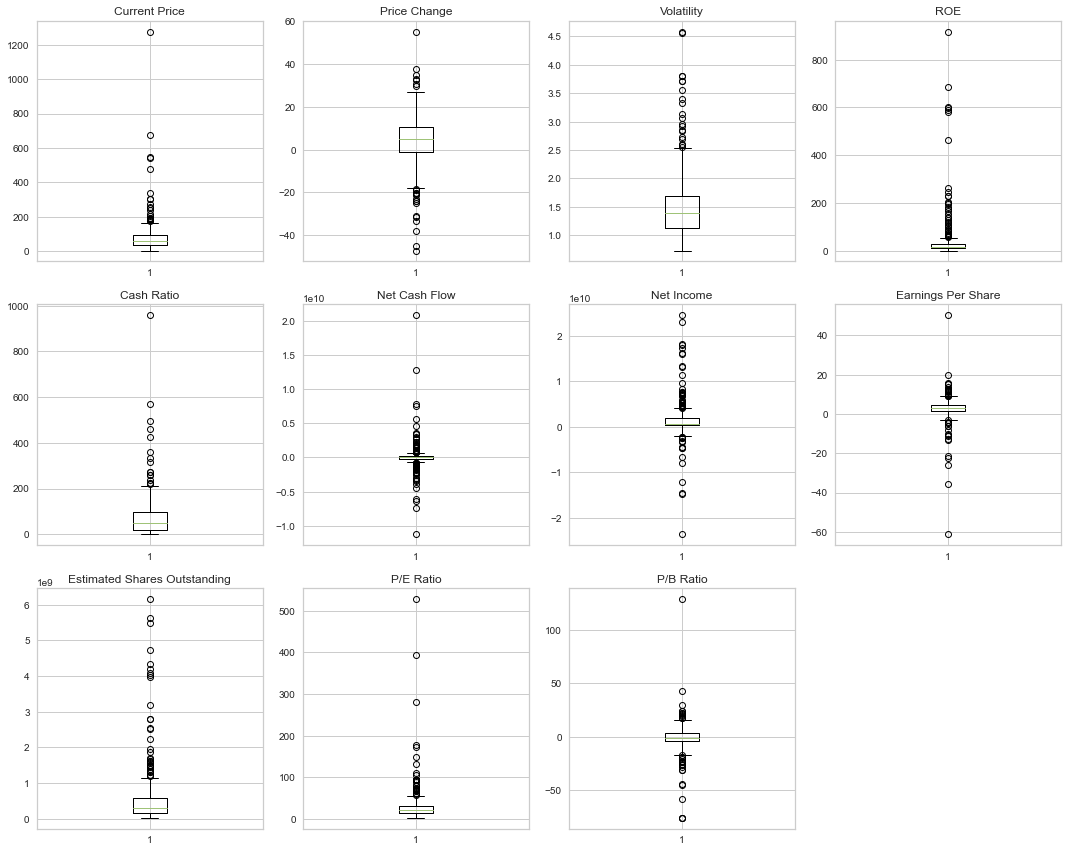

In [52]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are some outliers in the dataset but will not be treated as this is reasonable and expected in this kind of dataset

### Scaling

- Let's scale the data before we proceed with clustering.

In [54]:
# variables used for clustering
num_vars = df.select_dtypes(include=np.number).columns.tolist()
num_vars

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [55]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[num_vars].copy()  
subset_scaled = scaler.fit_transform(subset)

In [56]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

In [57]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.0804000992262885
Number of Clusters: 7 	Average Distortion: 2.028979422017739
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.6735598572597035


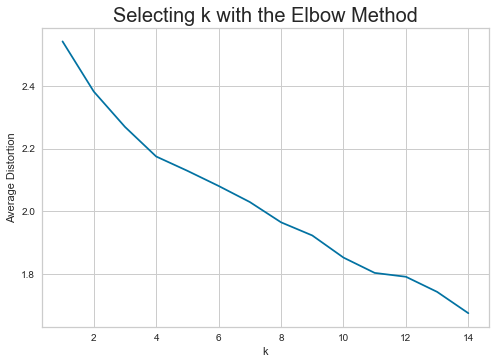

In [58]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Appropriate value for k seems to be 4 or 6.**

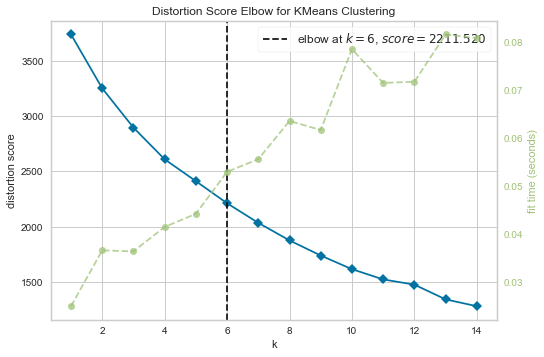

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213616)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968684)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829898)


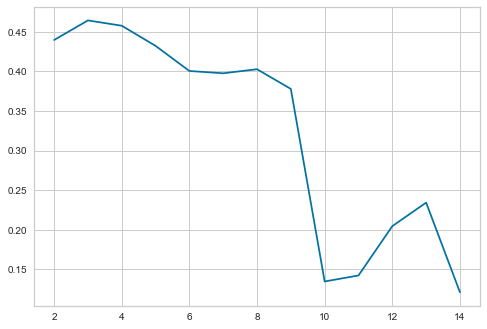

In [60]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 4 is higher than that for 6. So, we will choose 4 as value of k.**

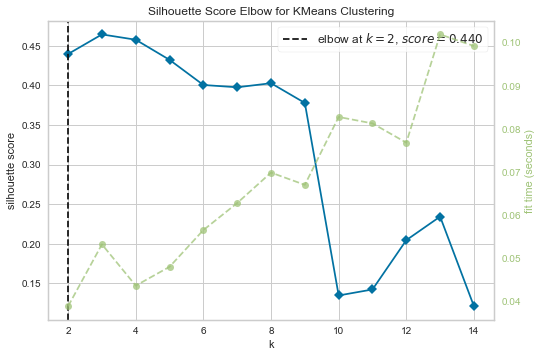

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [61]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

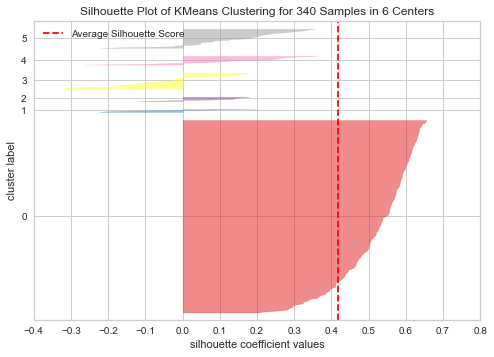

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [90]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))   # try 6 clusters
##  visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

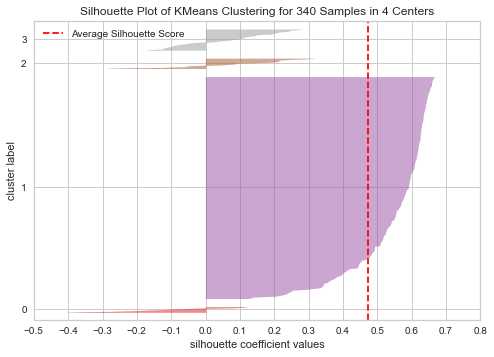

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [91]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  # try 4 clusters
##  visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

In [92]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)  ## choose 4 as the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [93]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiles

In [94]:
km_cluster_profile = df1.groupby("KM_segments").mean()  ##  groupby the cluster labels

In [95]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ##  groupby the cluster labels
)

In [96]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,536.179993,9.575377,1.572383,15.625000,163.625000,192455375.000000,722016625.000000,12.693750,128041091.152500,138.982037,27.727469,8
1,73.709956,5.519191,1.404905,34.162069,65.475862,38295834.482759,1447992072.413793,3.598638,442582896.274517,24.843720,-2.777746,290
2,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
3,39.209643,-13.767941,2.942082,109.464286,55.321429,-157380142.857143,-3741645321.428571,-9.066429,466855285.547857,88.663167,1.747554,28


In [97]:
# check how many companies are in each cluster
df1.groupby(["KM_segments"])['Security'].count()

KM_segments
0      8
1    290
2     14
3     28
Name: Security, dtype: int64

In [98]:
# check how many companies by sector are in each cluster
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          3
             Health Care                     3
             Information Technology          1
             Real Estate                     1
1            Consumer Discretionary         35
             Consumer Staples               18
             Energy                          7
             Financials                     45
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     3
             Utilities                      24
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     3
             Inform

In [99]:
##  print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cater

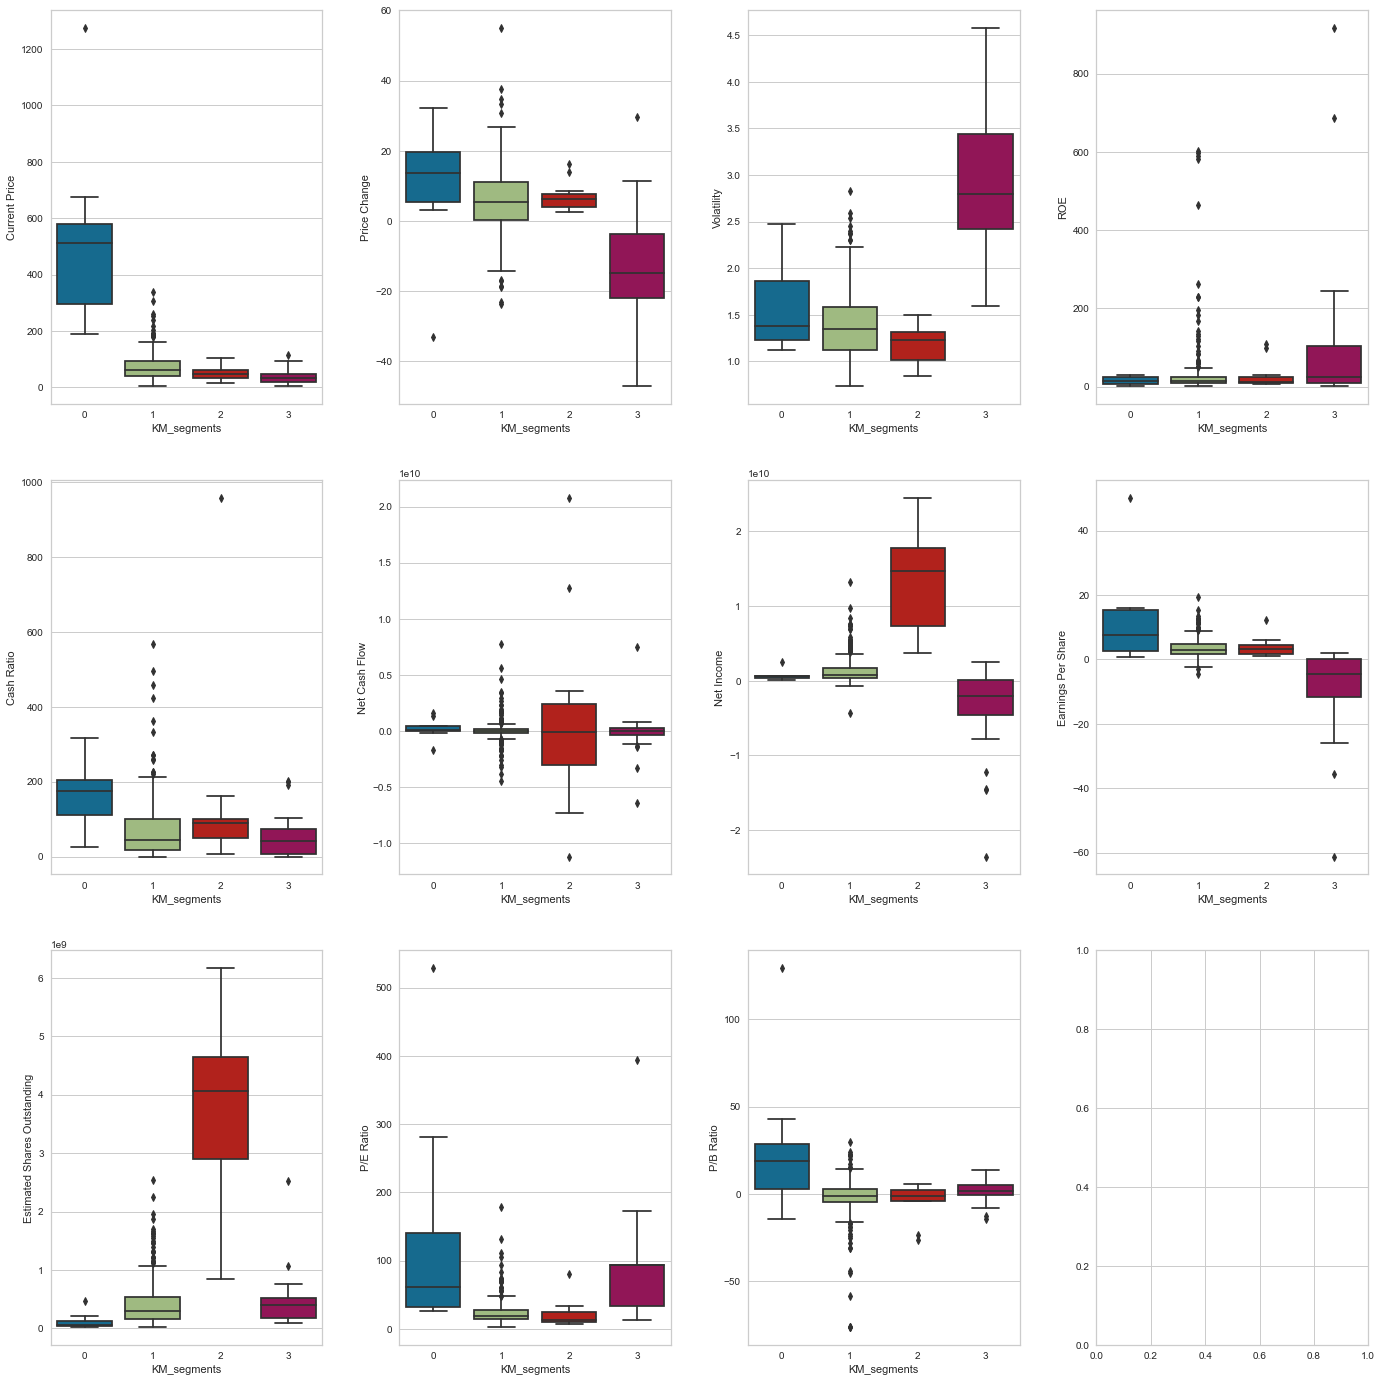

In [100]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Insights (K-Means Clustering)

- **Cluster 0**:
    - This cluster has stocks which are on the high side of price, positive price change, volatility,  cash ratio earnings per share, P/E ratio and P/B ratio.
    - Almost no net income and net cash flow is generated from the stocks in this cluster but has little earnings per share
    - They also have little or no estimted shares oustanding and ROE. 

- **Cluster 1**:
    - This cluster has stocks with median price of around USD50, positive price change, high volatility, high cash ratio, and some estimted shares oustanding, P/E ratio and P/B ratio.
    - Also almost no net cash flow is generated from the stocks in this cluster
    - They also have little or no ROE and P/E ratio. 

- **Cluster 2**:
    - This cluster has stocks with low price, positive price change, low volatility, high cash ratio, and significantly high net income and high estimted shares oustanding 
    - Also almost no net cash flow is generated from the stocks in this cluster
    - Their earnings per share are low as well as ROE, P/B ratio and P/E ratio. 

- **Cluster 3**:
    - This cluster also has stocks with low price but negative price change, really high volatility, high P/E ratio, and ROE and some estimted shares oustanding 
    - Also almost no net cash flow is generated from the stocks in this cluster
    - Their earnings per share are negative as well as the net income 

## Hierarchical Clustering

In [103]:
hc_df = subset_scaled_df.copy()

In [104]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] 

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750721.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correlatio

**Let's explore different linkage methods with Euclidean distance only.**

In [105]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

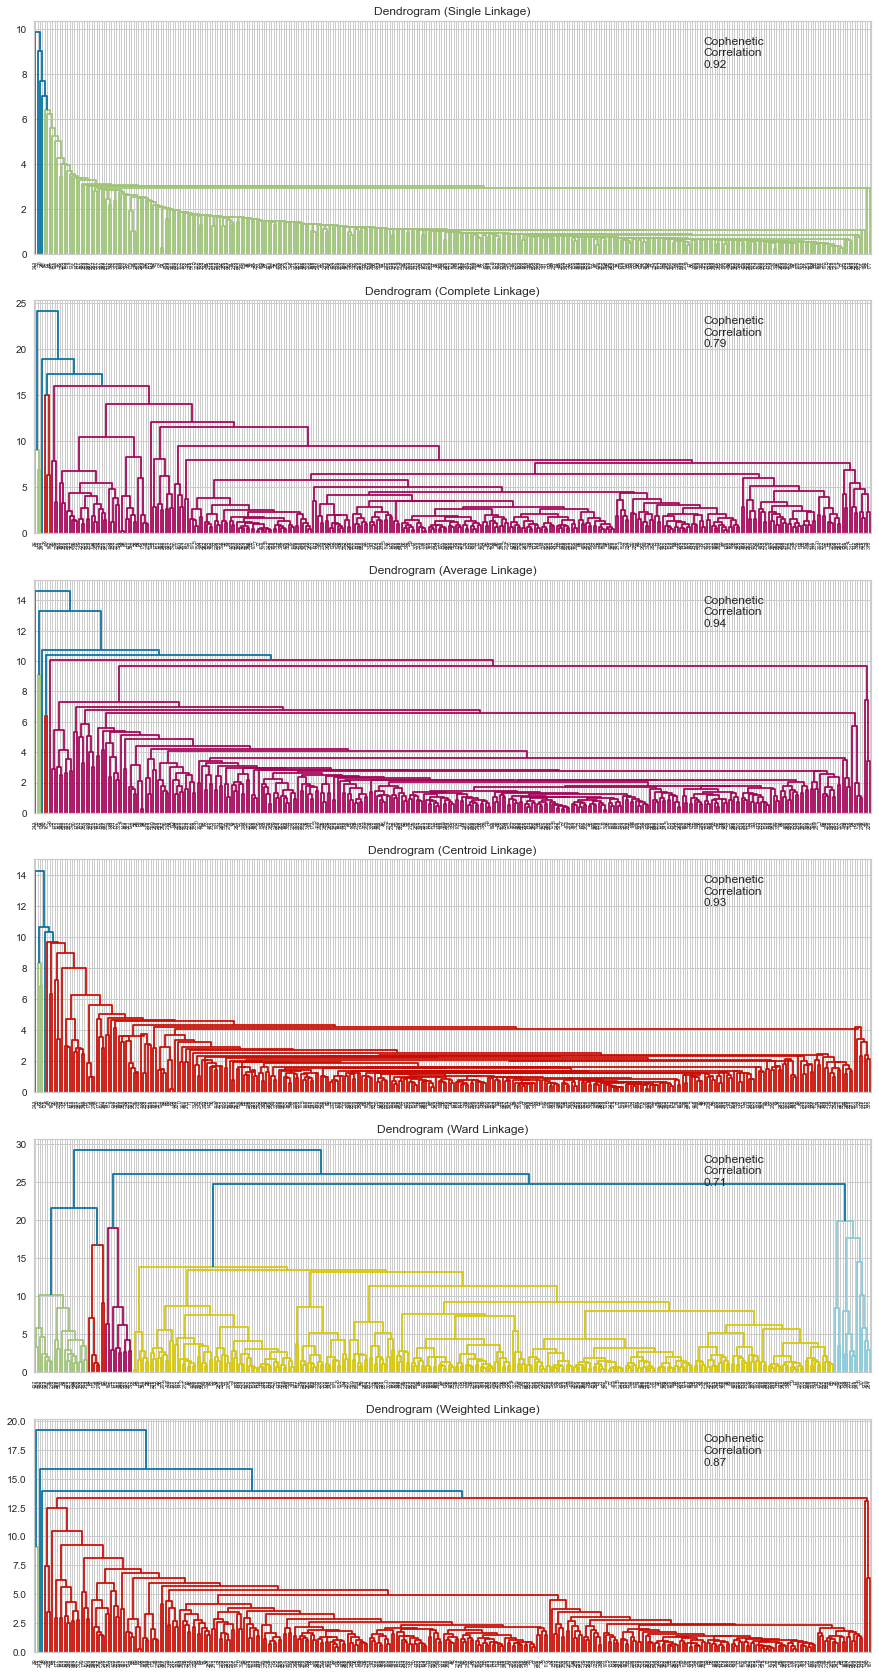

In [106]:
# list of linkage methods
linkage_methods =  ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Ward linkage shows distinct and separate clusters.
- 4 would be the appropriate number of clusters for Ward linkage

In [107]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


In [108]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
# define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

In [109]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [110]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  ##  groupby the cluster labels

In [111]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ##  groupby the cluster labels
)

In [112]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


In [113]:
# check number of companies in each cluster
df2.groupby(["HC_segments"])['Security'].count()

HC_segments
0     29
1     15
2     11
3    285
Name: Security, dtype: int64

In [114]:
# check number of companies by sector in each cluster
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

In [115]:
##  print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

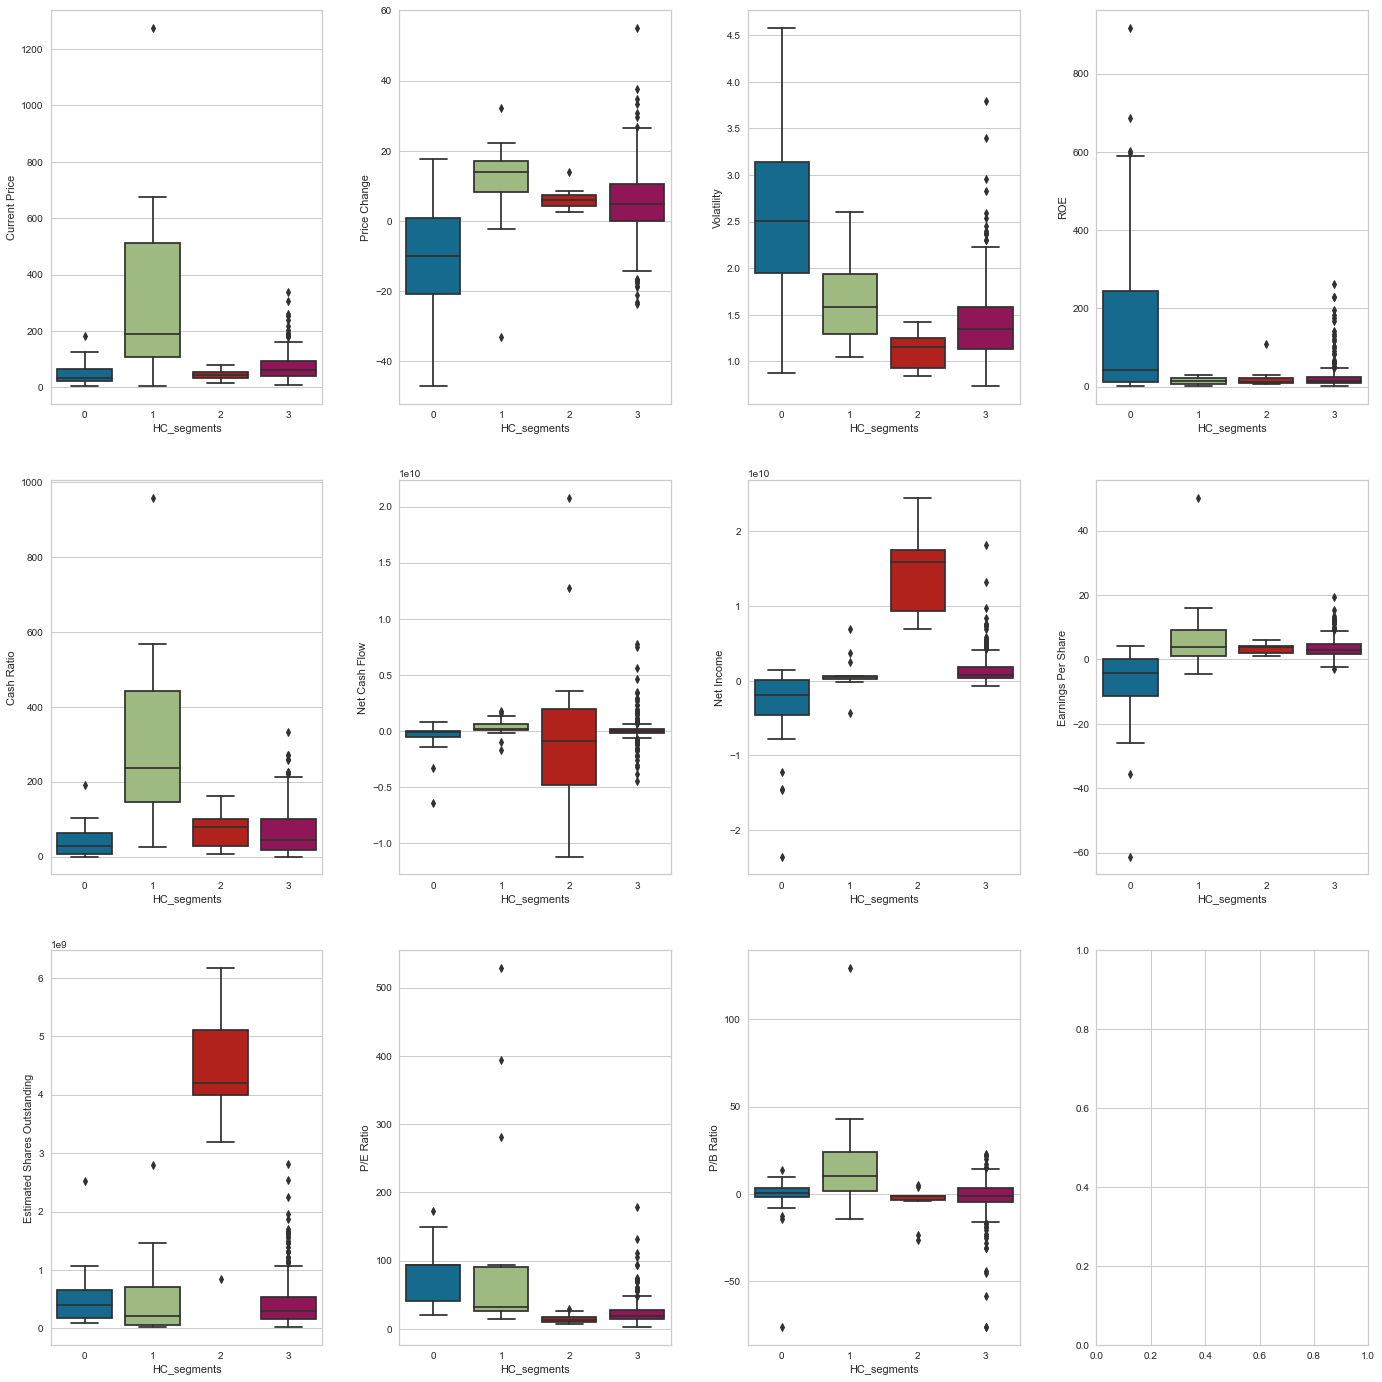

In [116]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Insights (Hierarchical Clustering)

- **Cluster 0**:
    - This cluster also has stocks with low price but negative price change, really high volatility, high P/E ratio, and ROE and some estimted shares oustanding 
    - Also almost no net cash flow is generated from the stocks in this cluster
    - Their earnings per share are negative as well as the net income 
    
- **Cluster 1**:
    - This cluster has stocks which are on the high side of price, positive price change, volatility,  cash ratio earnings per share, P/E ratio and P/B ratio.
    - Almost no net income and net cash flow is generated from the stocks in this cluster but has little earnings per share
    - They also have little estimted shares oustanding and almost no ROE. 

- **Cluster 2**:
    - This cluster has stocks with low price, positive price change, low volatility, a significantly high net income and high estimted shares oustanding 
    - Negative net cash flow but high net income is generated from the stocks in this cluster
    - Their earnings per share are low as well as ROE, P/B ratio and P/E ratio. 
    
- **Cluster 3**:
    - This cluster has stocks with median price of around USD50, positive price change, high volatility, high cash ratio,  some net income, estimted shares oustanding and P/B ratio.
    - Also almost no net cash flow is generated from the stocks in this cluster
    - They also have little or no ROE and P/E ratio. 




## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
    - The K-Means Clustering technique took less time for execution
- Which clustering technique gave you more distinct clusters, or are they the same?
    - Both clustering techniques gave same distinct clusters
- How many observations are there in the similar clusters of both algorithms?
    - For K-Means, cluster 1 has 290 obs and its similar to Hierarchical cluster 3 with 285 obs
    - For K-Means, cluster 2 has 14 obs and its similar to Hierarchical cluster 2 with 11 obs
    - For K-Means, cluster 0 has 8 obs and its similar to Hierarchical cluster 1 with 15 obs
    - For K-Means, cluster 3 has 28 obs and its similar to Hierarchical cluster 0 with 29 obs    
- How many clusters are obtained as the appropriate number of clusters from both algorithms?
    - 4 clusters were obtained as appropriate from both techniques


## Actionable Insights and Recommendations

- Cluster 3 for Hierachichal technique which is similar to cluster 1 from the K-Means technique consists of stocks with affordable prices, which generates some net income and has some positive price change. These stocks can be recommended for customers who want to take minimal risk in their investment

- Cluster 2 for Hierachichal technique which is similar to cluster 2 from the K-Means technique consists of stocks with low prices, and generates really net income and has some positive price change. These stocks can be recommended for customers who are short time buyers and may want to take high risk in their investment

- Clusters 0 and 1 for Hierachichal technique which is similar to cluster 0 and 3 from the K-Means technique consists stocks that generate no income should probably be put on a watch and not recommed to customers